<a href="https://colab.research.google.com/github/Lakshmitejasri/Movie_Recommendation_System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162714 sha256=08b21197613b209408d45f03e2a7e48d36875c1438035e1953ae87ac65fe78fe
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


#Import the necessary libraries

In [2]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
import matplotlib.pyplot as plt
import seaborn as sns

#Load the datasets

In [3]:
ratings = pd.read_csv('/content/rating.csv')
movies = pd.read_csv('/content/movie.csv')

#Merge the Datasets

In [4]:
data = pd.merge(ratings, movies, on='movieId')

#Create a surprise dataset

In [5]:
reader = Reader(rating_scale=(0.5, 5))
data_surprise = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

#Splitting of dataset into training and testing

In [6]:
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)


#Building of collaborative filtering model(SVD Algorithm)

In [7]:
model = SVD()
model.fit(trainset)

#Predictions on the test data

In [8]:
predictions = model.test(testset)

#Evaluation of the model

In [9]:
accuracy.rmse(predictions)

RMSE: nan


nan

#Function to get movie recommendations for a user

In [10]:
def get_recommendations(user_id, n=5):
    user_movies = data[data['userId'] == user_id]['movieId'].unique()
    all_movies = data['movieId'].unique()
    unseen_movies = [movie for movie in all_movies if movie not in user_movies]

    predictions = []
    for movie in unseen_movies:
        predictions.append((movie, model.predict(user_id, movie).est))

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get top N recommendations
    top_n = predictions[:n]

    # Get movie names for the recommendations
    movie_names = movies[movies['movieId'].isin([x[0] for x in top_n])]['title']

    return movie_names

#Getting top 5 movie recommendations for user 1

In [11]:
user_id = 1
recommendations = get_recommendations(user_id, n=5)
print(f"Top 5 movie recommendations for user {user_id}:\n{recommendations}")

Top 5 movie recommendations for user 1:
72                              Misérables, Les (1995)
1125       Wallace & Gromit: The Wrong Trousers (1993)
1149    Cinema Paradiso (Nuovo cinema Paradiso) (1989)
1239                  Manchurian Candidate, The (1962)
5917               City of God (Cidade de Deus) (2002)
Name: title, dtype: object


# Visualization: User's Ratings

<ipython-input-12-281934ecc865>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=user_ratings, palette='viridis')


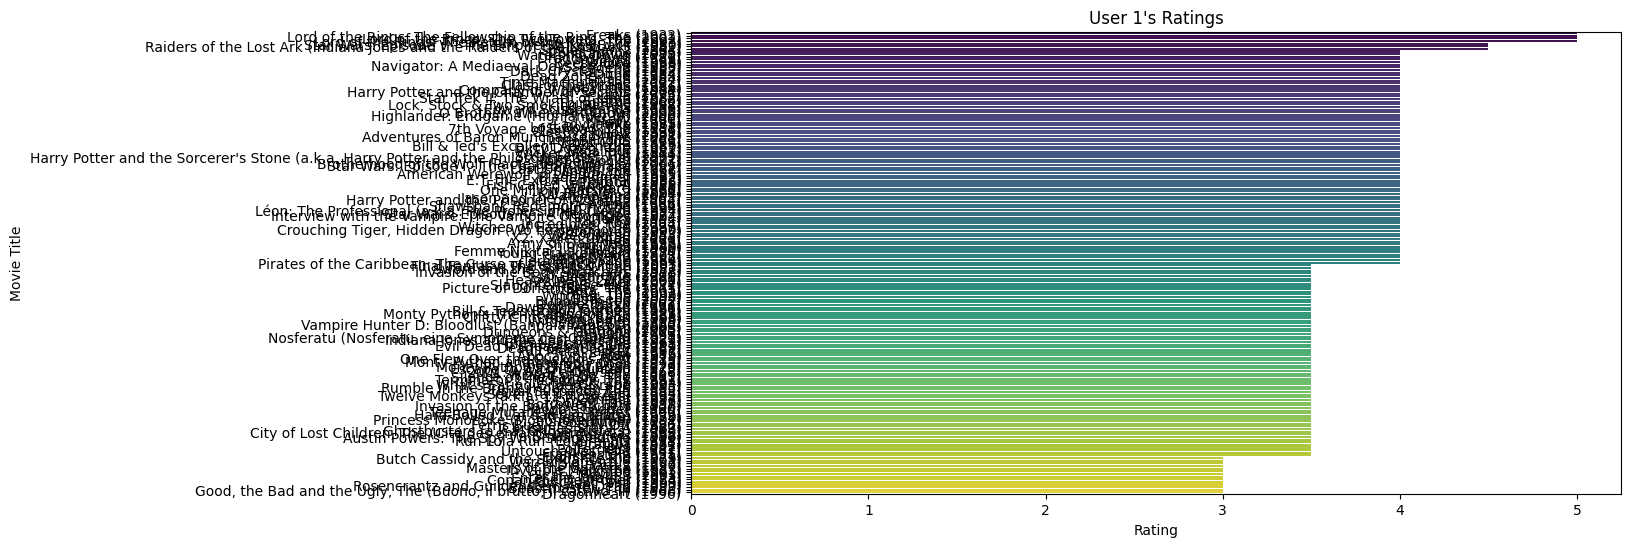

In [12]:
user_ratings = data[data['userId'] == user_id].sort_values(by='rating', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='title', data=user_ratings, palette='viridis')
plt.title(f"User {user_id}'s Ratings")
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()

# Visualization: Predicted Ratings for Top Recommendations

<ipython-input-13-d4282811f4c3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='est', y='movie_title', data=predicted_ratings.head(10), palette='mako')


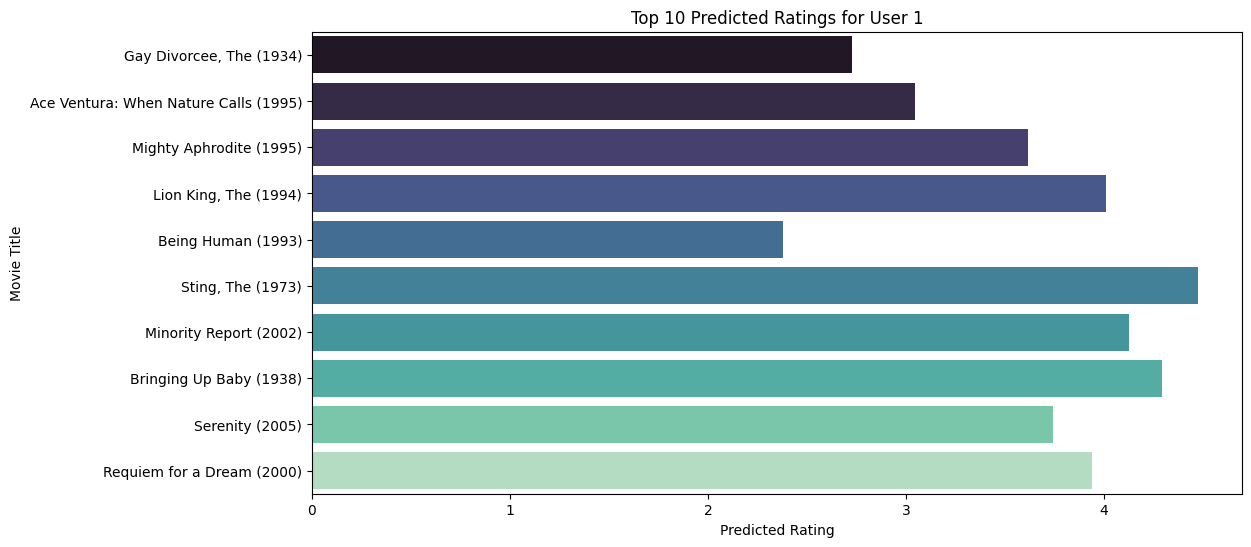

In [13]:
predicted_ratings = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
predicted_ratings['movie_title'] = predicted_ratings['iid'].apply(lambda x: movies[movies['movieId'] == x]['title'].values[0])
plt.figure(figsize=(12, 6))
sns.barplot(x='est', y='movie_title', data=predicted_ratings.head(10), palette='mako')
plt.title(f"Top 10 Predicted Ratings for User {user_id}")
plt.xlabel('Predicted Rating')
plt.ylabel('Movie Title')
plt.show()

# Visualization: Histogram of Actual Ratings and Predicted Ratings

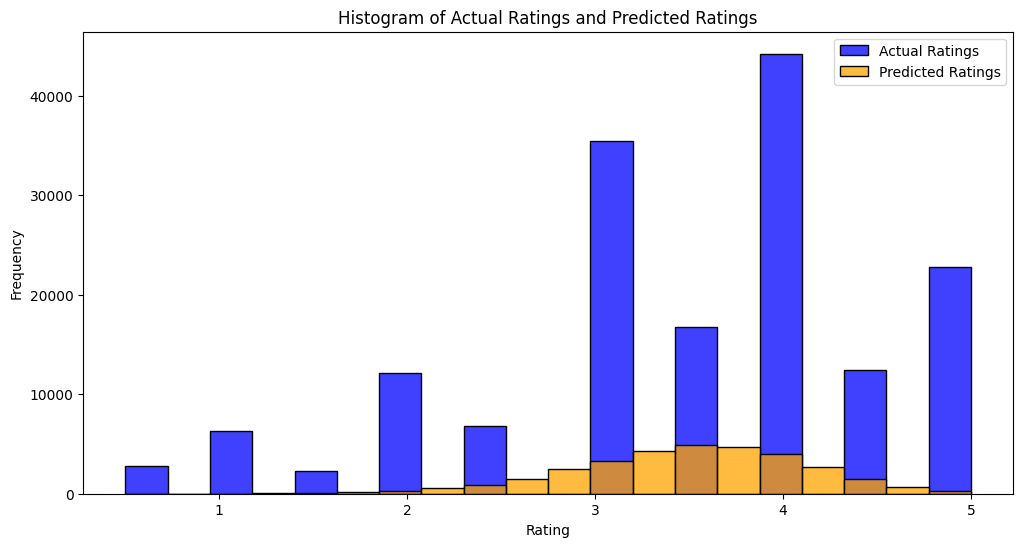

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data['rating'], bins=20, kde=False, color='blue', label='Actual Ratings')
sns.histplot(predicted_ratings['est'], bins=20, kde=False, color='orange', label='Predicted Ratings')
plt.title('Histogram of Actual Ratings and Predicted Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [19]:
predicted_ratings.head()

,uid,iid,rui,est,details,movie_title
0,104,907,3.0,2.725539,{'was_impossible': False},"Gay Divorcee, The (1934)"
1,8,19,1.0,3.044635,{'was_impossible': False},Ace Ventura: When Nature Calls (1995)
2,518,52,5.0,3.615475,{'was_impossible': False},Mighty Aphrodite (1995)
3,1038,364,3.0,4.011916,{'was_impossible': False},"Lion King, The (1994)"
4,417,418,2.0,2.380028,{'was_impossible': False},Being Human (1993)


#Visualization: Scatter Plot of Actual vs Predicted Ratings

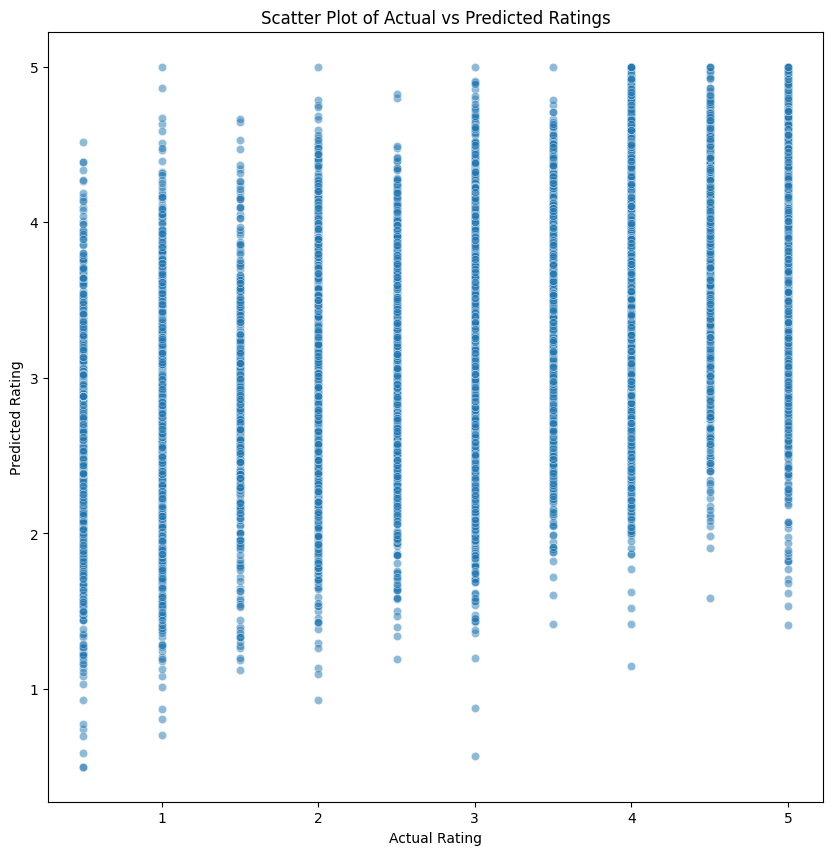

In [20]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='rui', y='est', data=predicted_ratings, alpha=0.5)
plt.title('Scatter Plot of Actual vs Predicted Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()